# **Submission Dicoding**

# Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series

Ita Sulistiani / itasulis16@gmail.com

username : haru.haruru_

In [1]:
# install package untuk kaggle
!pip install -q kaggle

In [2]:
# upload file kredensial kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"itasulistiani","key":"37ebf60897a6a643775b64e4303c7e94"}'}

In [3]:
# membuat direktori dan merubah izin
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
# download dataset

!kaggle datasets download -d mahirkukreja/delhi-weather-data

  0% 0.00/1.00M [00:00<?, ?B/s]
100% 1.00M/1.00M [00:00<00:00, 68.7MB/s]


In [5]:
# ekstraksi file
!mkdir weather
!unzip delhi-weather-data.zip -d weather
!ls weather

Archive:  delhi-weather-data.zip
  inflating: weather/testset.csv     
testset.csv


In [6]:
# load dataset
import pandas as pd

df = pd.read_csv('/content/weather/testset.csv')
df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [7]:
# cek deskripsi data

df.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [8]:
# cek shape data
df.shape

(100990, 20)

In [9]:
# cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [10]:
# cek apakah ada nilai yang null
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [11]:
# cek daftar kolom
df.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [12]:
# penyesuaian format datetime

df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [13]:
# mengisi kolom humidity yang kosong dengan mean data

df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

data = df[['datetime_utc', ' _hum']]
data.head()

,datetime_utc,_hum
0,1996-11-01 11:00:00,27.0
1,1996-11-01 12:00:00,32.0
2,1996-11-01 13:00:00,44.0
3,1996-11-01 14:00:00,41.0
4,1996-11-01 16:00:00,47.0


In [14]:
# memisahkan jam dari date
data['date'] = data['datetime_utc'].dt.date

# drop kolom date asli
data = data.drop('datetime_utc', axis = 1)

# set index ke date
data.set_index('date', inplace=True)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,_hum
date,
1996-11-01,27.0
1996-11-01,32.0
1996-11-01,44.0
1996-11-01,41.0
1996-11-01,47.0
...,...
2017-04-24,25.0
2017-04-24,16.0
2017-04-24,14.0


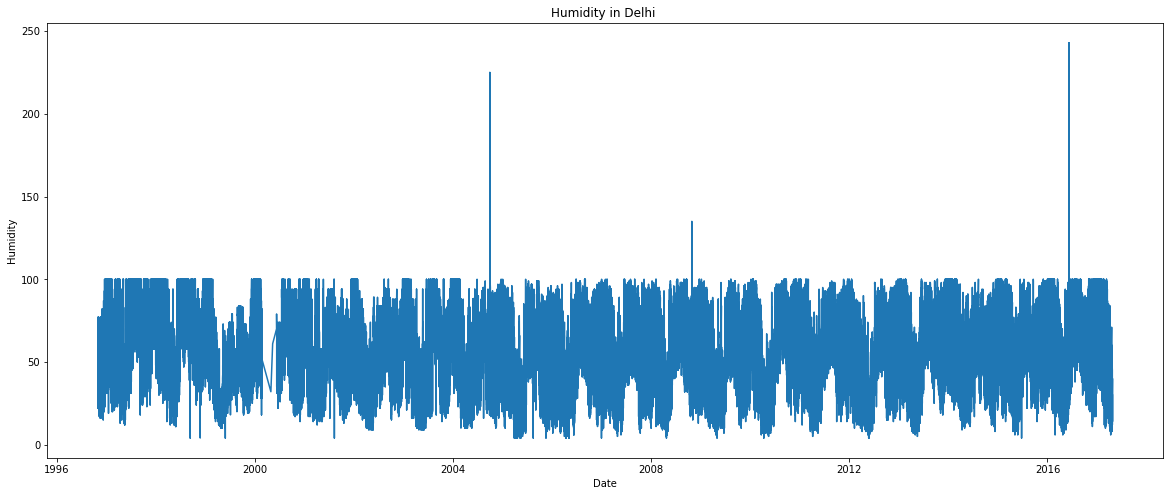

In [15]:
# plotting time series

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(data)
plt.title('Humidity in Delhi ')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()

In [16]:
# convert data ke dalam data values

date = df['datetime_utc'].values
temp = df[' _hum'].values

In [17]:
# windowed_dataset

import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis = -1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift = 1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [18]:
# membagi dataset menjadi data train dan data test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(temp, date, test_size = 0.2)

In [19]:
# cek jumlah data train dan data test
print(len(X_train), len(X_test))

80792 20198


In [21]:
# menghitung skala data humidity dalam dataset

min = df[' _hum'].min()
max = df[' _hum'].max()

x = (max - min) * 0.1
x = round(x, 2)
print('humidity min: ', min)
print('humidity max: ', max)
print('scale: ', x)

humidity min:  4.0
humidity max:  243.0
scale:  23.9


In [22]:
# arsitektur model

train_set = windowed_dataset(X_train, window_size=60, batch_size=100, shuffle_buffer=5000)
test_set = windowed_dataset(X_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM(64, return_sequences=True),
                                    tf.keras.layers.LSTM(64, return_sequences=True),
                                    tf.keras.layers.Dense(30, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='relu'),
                                    tf.keras.layers.Dense(1),
])


In [23]:
# menentukan optimizer dan kompile model

optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer, 
              metrics = ['mae'])

In [24]:
# membuat kelas callback untuk menghentikan training ketika nilai mae tertentu tercapai
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < x):
      self.model.stop_training = True
stop_training = Callback()

In [25]:
# training model

training_history = model.fit(train_set, 
                             epochs = 500,
                             validation_data = test_set,
                             callbacks = [stop_training])

Epoch 1/500
808/808 [==============================] - 113s 133ms/step - loss: 37.3033 - mae: 37.8006 - val_loss: 20.1152 - val_mae: 20.6103
Epoch 2/500
808/808 [==============================] - 105s 129ms/step - loss: 20.1275 - mae: 20.6223 - val_loss: 19.9509 - val_mae: 20.4447


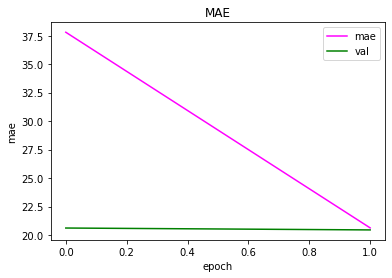

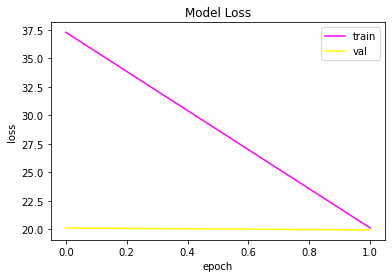

In [26]:
# visualisasi training model

mae = training_history.history['mae']
val_mae = training_history.history['val_mae']

loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

plt.plot(mae, color = 'magenta')
plt.plot(val_mae, color = 'green')
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['mae', 'val'], loc = 'upper right')
plt.show()

plt.plot(loss, color = 'magenta')
plt.plot(val_loss, color = 'yellow')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()